# Testing smoking prevalence as explanatory variable for death rate


## Code book

### For Covid-19 data

#### Variables and their units

- We have the dataframe df_infected which contains the number of people tested positive on covid-19
- dates (columns): days of the year 2020 from end of January to today with the respective number of infected/deaths 
- deaths (entries of df_deaths): # of people died of covid-19
- Infected (entries of df_infected): # of people tested positive on covid-19
- Countries (index): Names of all Countries that maintain a record of their covid-19 cases
- Continents (column): Names of all Continents excluding Antarctica

#### Summary choices made

- Created seperate df (df_infected) where only the latest date is displayed with additional information of the respective infected once
- Created df for continents by introducing a column and groupby function 

### For democracy data

#### Variables and their units

- Our Dataframe called democracy containes following columns
    - Entity : Name of Country (index)
    - Code : abbrevation for country
    - Year : period of data collection
    - Share of deaths from smoking (%) : Which percentage of deaths are attributed to smoking
    - death rate : number of infected divided by number of deaths
    
#### Summary choices made


- We matched the death rate entries in democracy with the one from Covid-19
- Region will be changed to the respective continent of the country



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data from: https://github.com/CSSEGISandData/COVID-19

In [26]:
#import data of deaths and infected
deaths = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
infected = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
infected_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#add a column called United States to the US datasets so that they are compatible
deaths_US['Country/Region'] = 'United States'
infected_US['Country/Region'] = 'United States'

In [27]:
#statistics for countries (group all regions together)
deaths = deaths.groupby('Country/Region').sum() 
infected = infected.groupby('Country/Region').sum() 
#sum over all states in the US
deaths_US = deaths_US.groupby('Country/Region').sum()
infected_US = infected_US.groupby('Country/Region').sum()

In [28]:
#take just the most recent day (i.e. data) for analysis
deaths = deaths[deaths.columns[-1]]
infected = infected[infected.columns[-1]]
deaths_US = deaths_US[deaths_US.columns[-1]]
infected_US = infected_US[infected_US.columns[-1]]
deaths = deaths.append(deaths_US)
infected = infected.append(infected_US)

In [29]:
#create a pd.series with contains deathrates for all countries within the datasets
deathrate = deaths/infected
countries_deathrate = deathrate.index

data from: https://ourworldindata.org/grapher/share-deaths-smoking

In [30]:
data = pd.read_csv('./csv/smoking.csv')

In [31]:
data

,Entity,Code,Year,Share of deaths from smoking (%)
0,Afghanistan,AFG,1990,3.26
1,Afghanistan,AFG,1991,3.21
2,Afghanistan,AFG,1992,3.14
3,Afghanistan,AFG,1993,2.84
4,Afghanistan,AFG,1994,2.65
5,Afghanistan,AFG,1995,2.61
6,Afghanistan,AFG,1996,2.61
7,Afghanistan,AFG,1997,2.58
8,Afghanistan,AFG,1998,2.50
9,Afghanistan,AFG,1999,2.68


In [32]:
data = data.loc[data['Year']==2017]

In [33]:
data

,Entity,Code,Year,Share of deaths from smoking (%)
27,Afghanistan,AFG,2017,4.08
55,Africa,NaN,2017,3.80
83,Albania,ALB,2017,19.11
111,Algeria,DZA,2017,11.08
139,American Samoa,ASM,2017,9.51
167,Andorra,AND,2017,14.25
195,Angola,AGO,2017,4.78
223,Antigua and Barbuda,ATG,2017,6.75
251,Argentina,ARG,2017,15.61
279,Armenia,ARM,2017,17.22


In [34]:
country_names_smoking = np.ndarray.tolist(data['Entity'].unique())

In [35]:
#loop through data and create new df that contains only these elementes
#that are part of deathrate.index 

final_data = pd.DataFrame()
for index, row in data.iterrows():
    if row['Entity'] in countries_deathrate:
          final_data = final_data.append(row)
            

In [36]:
final_data

,Code,Entity,Share of deaths from smoking (%),Year
27,AFG,Afghanistan,4.08,2017.0
83,ALB,Albania,19.11,2017.0
111,DZA,Algeria,11.08,2017.0
167,AND,Andorra,14.25,2017.0
195,AGO,Angola,4.78,2017.0
223,ATG,Antigua and Barbuda,6.75,2017.0
251,ARG,Argentina,15.61,2017.0
279,ARM,Armenia,17.22,2017.0
363,AUS,Australia,12.62,2017.0
391,AUT,Austria,14.13,2017.0


In [37]:
len(deathrate)
#we have to diminish deathrate series

189

In [38]:
#make the Location to the index, so that we can easily sort the dataframe and get the deathrate we want 
final_data.set_index('Entity', inplace=True)

In [39]:
deathrate = deathrate.get(list(final_data.index))
#get only the countries where we have lifeexpectancy data


#sort dataframe and series so that we can easily append each to another
final_data = final_data.sort_index()
deathrate = deathrate.sort_index()

In [40]:
final_data['deathrate'] = deathrate

In [41]:
final_data

,Code,Share of deaths from smoking (%),Year,deathrate
Entity,,,,
Afghanistan,AFG,4.08,2017.0,0.023259
Albania,ALB,19.11,2017.0,0.032666
Algeria,DZA,11.08,2017.0,0.076047
Andorra,AND,14.25,2017.0,0.067017
Angola,AGO,4.78,2017.0,0.057692
Antigua and Barbuda,ATG,6.75,2017.0,0.120000
Argentina,ARG,15.61,2017.0,0.044613
Armenia,ARM,17.22,2017.0,0.012696
Australia,AUS,12.62,2017.0,0.014140


### Scatterplot

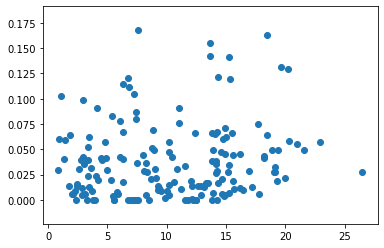

In [42]:
plt.scatter(final_data['Share of deaths from smoking (%)'], final_data['deathrate'])

### Further steps
Since the spread has just started in the less developped countries and statistics are behind, we wait for statistical inference

In [43]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc

In [44]:
#Jupyter setup (to display in notebook)
init_notebook_mode(connected=True)

In [45]:
countries = np.asarray(list(final_data.index))
# Continent_code to Continent_names as a dictionary
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country by using the pc library
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting continent Information, insert at position 1, with column name 'continent'
final_data.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [46]:
final_data.loc[final_data['continent']=='Others']
final_data.loc[final_data.index=="Cote d'Ivoire" , 'continent'] = 'Africa'
final_data

,Code,continent,Share of deaths from smoking (%),Year,deathrate
Entity,,,,,
Afghanistan,AFG,Asia,4.08,2017.0,0.023259
Albania,ALB,Europe,19.11,2017.0,0.032666
Algeria,DZA,Africa,11.08,2017.0,0.076047
Andorra,AND,Europe,14.25,2017.0,0.067017
Angola,AGO,Africa,4.78,2017.0,0.057692
Antigua and Barbuda,ATG,North America,6.75,2017.0,0.120000
Argentina,ARG,South America,15.61,2017.0,0.044613
Armenia,ARM,Asia,17.22,2017.0,0.012696
Australia,AUS,Australia,12.62,2017.0,0.014140


In [48]:
fig = px.scatter(final_data,
    x = 'Share of deaths from smoking (%)',
    y = 'deathrate',
    hover_name=countries,
    color='continent',
    title='Share of deaths from smoking vs. deathrate')
fig.update_layout(
    xaxis_title="x Axis Title",
    yaxis_title="death rate"
    )
fig.show()